A new traveling agency is putting together a package for a flights, hotels, and rental cars based out of San Francisco and has a limited about of airlines to collaborate with for the deal, as well as a limited amount of international markets to advertise in. Which five airlines should the company pair with and which 3 international airports should the company market in?

This case study will have data analysis with trends and facts regarding this decision.

Data from City of San Francisco Open Data SFO Air Traffic Data and US Department of Transportation U.S. International Air Passenger and Freight Statistics Report.

In [1]:
import pandas as pd
import numpy as np
airtraffic = pd.read_csv('Air_Traffic_Passenger_Statistics (1).csv')
airtraffic.head()

,Activity Period,Operating Airline,Operating Airline IATA Code,Published Airline,Published Airline IATA Code,GEO Summary,GEO Region,Activity Type Code,Price Category Code,Terminal,Boarding Area,Passenger Count,Adjusted Activity Type Code,Adjusted Passenger Count,Year,Month
0,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Deplaned,Low Fare,Terminal 1,B,27271,Deplaned,27271,2005,July
1,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Enplaned,Low Fare,Terminal 1,B,29131,Enplaned,29131,2005,July
2,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Thru / Transit,Low Fare,Terminal 1,B,5415,Thru / Transit * 2,10830,2005,July
3,200507,Air Canada,AC,Air Canada,AC,International,Canada,Deplaned,Other,Terminal 1,B,35156,Deplaned,35156,2005,July
4,200507,Air Canada,AC,Air Canada,AC,International,Canada,Enplaned,Other,Terminal 1,B,34090,Enplaned,34090,2005,July


In [2]:
airtraffic = airtraffic.drop(columns=['Activity Period', 'Operating Airline','Operating Airline IATA Code','Terminal','Boarding Area','Adjusted Activity Type Code','Adjusted Passenger Count'])

In [3]:
airtraffic.head()
airtraffic.tail()
airtraffic = airtraffic[(airtraffic['Year'] != 2016) & (airtraffic['Year'] != 2005)]
airtraffic.head()

,Published Airline,Published Airline IATA Code,GEO Summary,GEO Region,Activity Type Code,Price Category Code,Passenger Count,Year,Month
543,US Airways,US,Domestic,US,Enplaned,Other,1253,2006,April
639,US Airways,US,Domestic,US,Deplaned,Other,1133,2006,April
697,ATA Airlines,TZ,Domestic,US,Deplaned,Low Fare,13010,2006,January
698,ATA Airlines,TZ,Domestic,US,Enplaned,Low Fare,12226,2006,January
699,ATA Airlines,TZ,Domestic,US,Thru / Transit,Low Fare,3316,2006,January


In [4]:
airtraffic['Published Airline'].unique()

array(['US Airways', 'ATA Airlines', 'Air Canada ', 'Air China',
       'Air France', 'Air New Zealand', 'AirTran Airways',
       'Alaska Airlines', 'All Nippon Airways', 'American Airlines',
       'Asiana Airlines', 'British Airways', 'Cathay Pacific',
       'China Airlines', 'Delta Air Lines', 'EVA Airways',
       'Frontier Airlines', 'Hawaiian Airlines', 'Japan Airlines',
       'KLM Royal Dutch Airlines', 'Korean Air Lines',
       'Lufthansa German Airlines', 'Mexicana Airlines',
       'Midwest Airlines', 'Northwest Airlines', 'Philippine Airlines',
       'Singapore Airlines', 'United Airlines - Pre 07/01/2013',
       'Sun Country Airlines', 'TACA', 'United Airlines',
       'Virgin Atlantic', 'WestJet Airlines', 'Qantas Airways',
       'Ameriflight', 'Icelandair', 'Spirit Airlines', 'BelAir Airlines',
       'Xtra Airways', 'Evergreen International Airlines', 'Aeromexico',
       'JetBlue Airways ', 'Miami Air International',
       'Southwest Airlines', 'Virgin America',

In [5]:
airtraffic = airtraffic.replace('United Airlines - Pre 07/01/2013','United Airlines')

In [6]:
airtraffic['Published Airline'].unique()

array(['US Airways', 'ATA Airlines', 'Air Canada ', 'Air China',
       'Air France', 'Air New Zealand', 'AirTran Airways',
       'Alaska Airlines', 'All Nippon Airways', 'American Airlines',
       'Asiana Airlines', 'British Airways', 'Cathay Pacific',
       'China Airlines', 'Delta Air Lines', 'EVA Airways',
       'Frontier Airlines', 'Hawaiian Airlines', 'Japan Airlines',
       'KLM Royal Dutch Airlines', 'Korean Air Lines',
       'Lufthansa German Airlines', 'Mexicana Airlines',
       'Midwest Airlines', 'Northwest Airlines', 'Philippine Airlines',
       'Singapore Airlines', 'United Airlines', 'Sun Country Airlines',
       'TACA', 'Virgin Atlantic', 'WestJet Airlines', 'Qantas Airways',
       'Ameriflight', 'Icelandair', 'Spirit Airlines', 'BelAir Airlines',
       'Xtra Airways', 'Evergreen International Airlines', 'Aeromexico',
       'JetBlue Airways ', 'Miami Air International',
       'Southwest Airlines', 'Virgin America', 'Aer Lingus',
       'Allegiant Air', 'Jet

In [7]:
airtraffic['Published Airline IATA Code'].unique()

array(['US ', 'TZ', 'AC', 'CA', 'AF', 'NZ', 'FL', 'AS', 'NH', 'AA', 'OZ',
       'BA', 'CX', 'CI', 'DL', 'BR', 'F9', 'HA', 'JL', 'KL', 'KE', 'LH',
       'MX', 'YX', 'NW', 'PR', 'SQ', 'UA', 'SY', 'TA', 'VS', 'WS', 'QF',
       'A8', 'FI', 'NK', '4T', 'XP', 'EZ', 'AM', 'B6', 'GL', 'WN', 'VX',
       'EI', 'G4', '9W', 'BBB', 'EK', 'WO', 'AB', 'RW', nan, 'LX', 'LP',
       'SE', 'MU', 'SK', '5Y', 'EY', 'CZ', 'TK', 'CM', 'AI'], dtype=object)

In [8]:
airtraffic['GEO Summary'].unique()

array(['Domestic', 'International'], dtype=object)

In [9]:
airtraffic['GEO Region'].unique()

array(['US', 'Canada', 'Asia', 'Europe', 'Australia / Oceania', 'Mexico',
       'Central America', 'Middle East', 'South America'], dtype=object)

In [10]:
airtraffic['Activity Type Code'].unique()

array(['Enplaned', 'Deplaned', 'Thru / Transit'], dtype=object)

In [11]:
airtraffic['Price Category Code'].unique()

array(['Other', 'Low Fare'], dtype=object)

In [12]:
print(airtraffic.isnull().sum())

Published Airline               0
Published Airline IATA Code    53
GEO Summary                     0
GEO Region                      0
Activity Type Code              0
Price Category Code             0
Passenger Count                 0
Year                            0
Month                           0
dtype: int64


In [13]:
airtraffic = airtraffic.drop(columns=['Published Airline IATA Code'])

In [14]:
airtraffic = airtraffic[['Month','Year','Published Airline','Passenger Count','GEO Summary','GEO Region','Activity Type Code','Price Category Code']]

In [15]:
airtraffic.head()

,Month,Year,Published Airline,Passenger Count,GEO Summary,GEO Region,Activity Type Code,Price Category Code
543,April,2006,US Airways,1253,Domestic,US,Enplaned,Other
639,April,2006,US Airways,1133,Domestic,US,Deplaned,Other
697,January,2006,ATA Airlines,13010,Domestic,US,Deplaned,Low Fare
698,January,2006,ATA Airlines,12226,Domestic,US,Enplaned,Low Fare
699,January,2006,ATA Airlines,3316,Domestic,US,Thru / Transit,Low Fare


In [16]:
import matplotlib.pyplot as plt

Total SFO Passengers by year

In [17]:
yearly = airtraffic.groupby(['Year']).sum()
print(yearly)
yearly.reset_index(inplace=True)

      Passenger Count
Year                 
2006         33332970
2007         35554082
2008         37234678
2009         37338942
2010         39253999
2011         40927786
2012         44399885
2013         44945760
2014         47114631
2015         50057887


Plot of total SFO Passengers over time.

Text(0.5, 1.0, 'Passengers at SFO by Year')

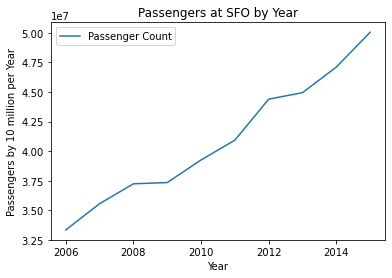

In [18]:
yearly.plot.line(x='Year',y='Passenger Count')
plt.ylabel('Passengers by 10 million per Year')
plt.title('Passengers at SFO by Year')

Total SFO Passengers by Month:

In [19]:
monthly = airtraffic.groupby(['Month']).sum()
monthly = monthly.reindex(['January','February','March','April','May','June','July','August','September','October','November','December'])
monthly = monthly.drop(columns=['Year'])
print(monthly)
monthly.reset_index(inplace=True)

           Passenger Count
Month                     
January           29339133
February          26900663
March             32650160
April             33106801
May               35558969
June              37721908
July              39326346
August            39557793
September         34516224
October           35620671
November          32371242
December          33490710


Total SFO Passengers by Month:

Text(0.5, 1.0, 'Passengers at SFO by Month')

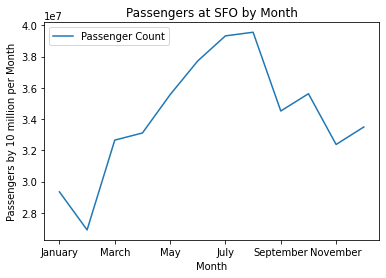

In [20]:
monthly.plot.line(x='Month',y='Passenger Count')
plt.ylabel('Passengers by 10 million per Month')
plt.title('Passengers at SFO by Month')

In [21]:
yearlydata = pd.DataFrame(airtraffic.groupby(['Year','Published Airline']).sum())
print(yearlydata)

                        Passenger Count
Year Published Airline                 
2006 ATA Airlines                105796
     Air Canada                  606534
     Air China                   117464
     Air France                  235893
     Air New Zealand             157560
...                                 ...
2015 United Airlines           22195144
     Virgin America             4164013
     Virgin Atlantic             300157
     WestJet Airlines             85359
     XL Airways France            20901

[415 rows x 1 columns]


In [22]:
yearlydata = yearlydata.sort_values(by=['Year','Passenger Count'],ascending=False)
yearlydata.index

MultiIndex([(2015,                  'United Airlines'),
            (2015,                  'Delta Air Lines'),
            (2015,                   'Virgin America'),
            (2015,               'Southwest Airlines'),
            (2015,                'American Airlines'),
            (2015,                  'Alaska Airlines'),
            (2015,                 'JetBlue Airways '),
            (2015,                       'US Airways'),
            (2015,                      'Air Canada '),
            (2015,                'Frontier Airlines'),
            ...
            (2006,                 'Midwest Airlines'),
            (2006,                   'Qantas Airways'),
            (2006,             'Sun Country Airlines'),
            (2006,                  'Spirit Airlines'),
            (2006,                       'Icelandair'),
            (2006,                  'BelAir Airlines'),
            (2006,                 'WestJet Airlines'),
            (2006,              

In [23]:
yearlytop10 = yearlydata.groupby('Year').head(10)

Top 10 Airlines by Year:

In [24]:
pd.set_option('display.max_rows', yearlytop10.shape[0]+1)
print(yearlytop10)

                                Passenger Count
Year Published Airline                         
2015 United Airlines                   22195144
     Delta Air Lines                    4178037
     Virgin America                     4164013
     Southwest Airlines                 3469646
     American Airlines                  3400335
     Alaska Airlines                    1473373
     JetBlue Airways                    1425228
     US Airways                         1402480
     Air Canada                          827660
     Frontier Airlines                   583777
2014 United Airlines                   21714658
     Virgin America                     3976013
     Delta Air Lines                    3899821
     Southwest Airlines                 3268483
     American Airlines                  2940158
     US Airways                         1743202
     Alaska Airlines                    1372069
     JetBlue Airways                    1047908
     Air Canada                         

Yearly by region:

In [25]:
byregion = pd.DataFrame(airtraffic.groupby(['Year','GEO Region']).sum())
byregion = byregion.sort_values(by=['Year','GEO Region'],ascending=False)
byregion = byregion.groupby('Year').head()
pd.set_option('display.max_rows', yearlytop10.shape[0]+1)
print(byregion)

                      Passenger Count
Year GEO Region                      
2015 US                      38814323
     Middle East               461244
     Mexico                   1002438
     Europe                   3205713
     Central America           161417
2014 US                      36844841
     South America              15647
     Middle East               259452
     Mexico                    995523
     Europe                   2842337
2013 US                      35201472
     South America              65412
     Middle East               223274
     Mexico                    834049
     Europe                   2719687
2012 US                      34836817
     South America              66453
     Middle East               226735
     Mexico                    850434
     Europe                   2514619
2011 US                      31872028
     South America              66758
     Middle East               216358
     Mexico                    585198
     Europe 

Domestic v International

In [26]:
domint = pd.DataFrame(airtraffic.groupby(['Year','GEO Summary']).sum())
domint = domint.sort_values(by=['Year','GEO Summary'],ascending=False)
domint = domint.groupby('Year').head()
pd.set_option('display.max_rows', yearlytop10.shape[0]+1)
print(domint)

                    Passenger Count
Year GEO Summary                   
2015 International         11243564
     Domestic              38814323
2014 International         10269790
     Domestic              36844841
2013 International          9744288
     Domestic              35201472
2012 International          9563068
     Domestic              34836817
2011 International          9055758
     Domestic              31872028
2010 International          8896807
     Domestic              30357192
2009 International          8359481
     Domestic              28979461
2008 International          9033106
     Domestic              28201572
2007 International          9070905
     Domestic              26483177
2006 International          8587037
     Domestic              24745933


Total Passengers at each airlines at SFO from 2006-2015

In [27]:
byairline = airtraffic.groupby(['Published Airline']).sum()
byairline = byairline.drop(columns=['Year'])
byairline = byairline.sort_values(by='Passenger Count',ascending = False)
byairline.head()

,Passenger Count
Published Airline,
United Airlines,189754424
American Airlines,32408836
Delta Air Lines,29057821
Virgin America,25888150
Southwest Airlines,24306946


In [28]:
byairline.reset_index(inplace=True)

In [29]:
from __future__ import division

oneyeargrowth = []
twoyeargrowth = []
fiveyeargrowth = []
current = []

for x in byairline['Published Airline']:
        if ((yearlydata.index.isin([(2015, x)]).any() == True) & (yearlydata.index.isin([(2010, x)]).any() == True) 
        & (yearlydata.index.isin([(2014, x)]).any() == True) & (yearlydata.index.isin([(2013, x)]).any() == True)):
            current.append(yearlydata.loc(axis=0)[2015, x].iloc[0])
            fiveyeargrowth.append(100*(((((yearlydata.loc(axis=0)[2015, x])
            - ((yearlydata.loc(axis=0)[2010, x]))))
            / (yearlydata.loc(axis=0)[2010, x])).iloc[0])/5)
            oneyeargrowth.append(100*((((yearlydata.loc(axis=0)[2015, x])
            - ((yearlydata.loc(axis=0)[2014, x]))))
            / (yearlydata.loc(axis=0)[2014, x])).iloc[0])
            twoyeargrowth.append(100*(((((yearlydata.loc(axis=0)[2015, x])
            - ((yearlydata.loc(axis=0)[2013, x]))))
            / (yearlydata.loc(axis=0)[2013, x])).iloc[0])/2)
        else:    
            fiveyeargrowth.append(0)
            oneyeargrowth.append(0)
            twoyeargrowth.append(0)
            current.append(0)
            

Airline Data SFO:

In [30]:
byairline['2015 Passengers'] = current
byairline['One year Growth(%)'] = oneyeargrowth
byairline['Avg Two year Growth(%)'] = twoyeargrowth
byairline['Avg Five year Growth(%)'] = fiveyeargrowth
byairline['Projected Growth(%)'] = (byairline['Avg Two year Growth(%)'] + byairline['Avg Five year Growth(%)'] + byairline['Avg Five year Growth(%)'])/3
byairline['2018 Projection'] = byairline['2015 Passengers'] + (3*(byairline['Projected Growth(%)']/100) * byairline['2015 Passengers'])
byairline.head(50)
#byairline.drop(columns=['level_0','index'],inplace=True)

,Published Airline,Passenger Count,2015 Passengers,One year Growth(%),Avg Two year Growth(%),Avg Five year Growth(%),Projected Growth(%),2018 Projection
0,United Airlines,189754424,22195144,2.212727,3.463471,5.501251,4.821991,2.540589e+07
1,American Airlines,32408836,3400335,15.651438,6.979178,1.105319,3.063272,3.712820e+06
2,Delta Air Lines,29057821,4178037,7.134071,9.782322,5.785465,7.117751,5.070184e+06
3,Virgin America,25888150,4164013,4.728355,4.567812,14.160164,10.962714,5.533479e+06
4,Southwest Airlines,24306946,3469646,6.154629,5.168759,3.505693,4.060048,3.892254e+06
5,US Airways,16308030,1402480,-19.545755,-6.683232,-2.057844,-3.599640,1.251027e+06
6,Alaska Airlines,13116324,1473373,7.383302,8.248658,6.206716,6.887363,1.777803e+06
7,JetBlue Airways,7458086,1425228,36.006978,15.653719,15.012209,15.226046,2.076246e+06
8,Air Canada,6212225,827660,13.221898,17.450874,9.479428,12.136577,1.129009e+06
9,Northwest Airlines,5573925,0,0.000000,0.000000,0.000000,0.000000,0.000000e+00


Airlines at SFO for 2015:

In [31]:
byairline.sort_values(by='2015 Passengers',ascending=False,inplace=True)
byairline.head(50)

,Published Airline,Passenger Count,2015 Passengers,One year Growth(%),Avg Two year Growth(%),Avg Five year Growth(%),Projected Growth(%),2018 Projection
0,United Airlines,189754424,22195144,2.212727,3.463471,5.501251,4.821991,2.540589e+07
2,Delta Air Lines,29057821,4178037,7.134071,9.782322,5.785465,7.117751,5.070184e+06
3,Virgin America,25888150,4164013,4.728355,4.567812,14.160164,10.962714,5.533479e+06
4,Southwest Airlines,24306946,3469646,6.154629,5.168759,3.505693,4.060048,3.892254e+06
1,American Airlines,32408836,3400335,15.651438,6.979178,1.105319,3.063272,3.712820e+06
6,Alaska Airlines,13116324,1473373,7.383302,8.248658,6.206716,6.887363,1.777803e+06
7,JetBlue Airways,7458086,1425228,36.006978,15.653719,15.012209,15.226046,2.076246e+06
5,US Airways,16308030,1402480,-19.545755,-6.683232,-2.057844,-3.599640,1.251027e+06
8,Air Canada,6212225,827660,13.221898,17.450874,9.479428,12.136577,1.129009e+06
11,Frontier Airlines,4291225,583777,38.523544,27.323915,10.841165,16.335415,8.698642e+05


Airlines at SFO by Proejction for 2018:

In [32]:
byairline.sort_values(by='2018 Projection',ascending=False,inplace=True)
byairline.head(50)

,Published Airline,Passenger Count,2015 Passengers,One year Growth(%),Avg Two year Growth(%),Avg Five year Growth(%),Projected Growth(%),2018 Projection
0,United Airlines,189754424,22195144,2.212727,3.463471,5.501251,4.821991,2.540589e+07
3,Virgin America,25888150,4164013,4.728355,4.567812,14.160164,10.962714,5.533479e+06
2,Delta Air Lines,29057821,4178037,7.134071,9.782322,5.785465,7.117751,5.070184e+06
4,Southwest Airlines,24306946,3469646,6.154629,5.168759,3.505693,4.060048,3.892254e+06
1,American Airlines,32408836,3400335,15.651438,6.979178,1.105319,3.063272,3.712820e+06
7,JetBlue Airways,7458086,1425228,36.006978,15.653719,15.012209,15.226046,2.076246e+06
6,Alaska Airlines,13116324,1473373,7.383302,8.248658,6.206716,6.887363,1.777803e+06
5,US Airways,16308030,1402480,-19.545755,-6.683232,-2.057844,-3.599640,1.251027e+06
8,Air Canada,6212225,827660,13.221898,17.450874,9.479428,12.136577,1.129009e+06
11,Frontier Airlines,4291225,583777,38.523544,27.323915,10.841165,16.335415,8.698642e+05


In [33]:
top10airlines2015 = byairline.sort_values(by='2015 Passengers',ascending=False).head(10)
top10airlines2018 = byairline.sort_values(by='2018 Projection',ascending=False).head(10)
top10airlinestotal = byairline.sort_values(by='Passenger Count',ascending=False).head(10)

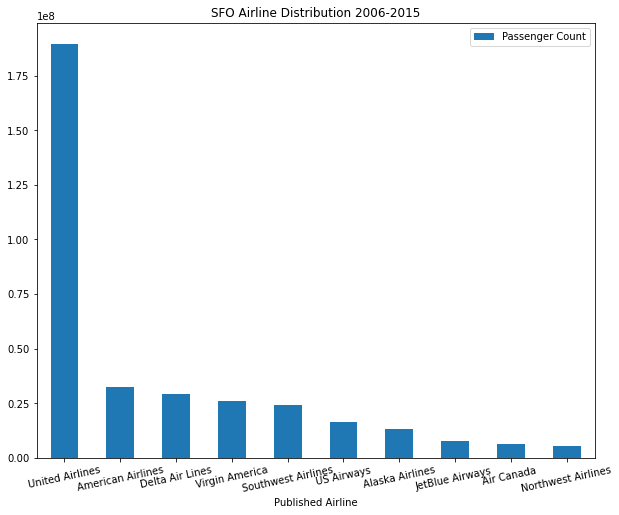

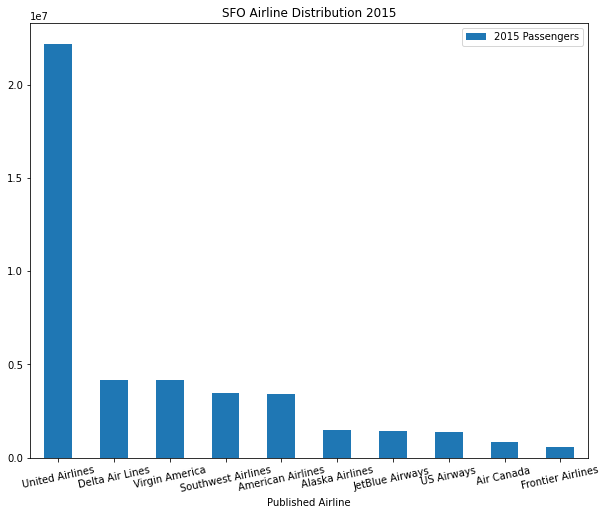

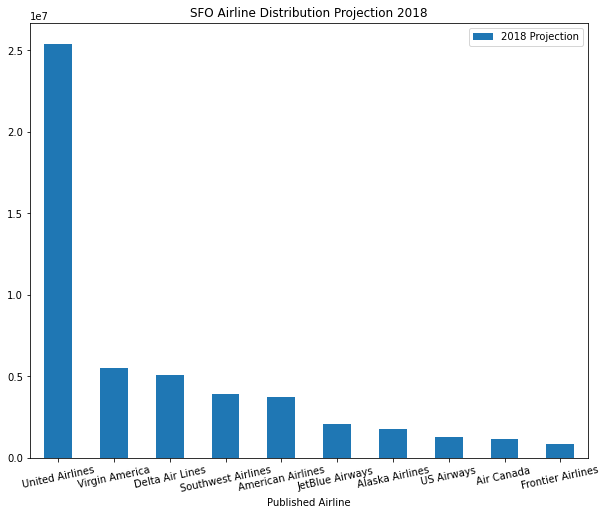

In [34]:
top10airlinestotal.plot(title='SFO Airline Distribution 2006-2015',x="Published Airline",y="Passenger Count",kind="bar", figsize = (10,8),rot=12, fontsize=10)
top10airlines2015.plot(title='SFO Airline Distribution 2015',x="Published Airline",y="2015 Passengers",kind="bar", figsize = (10,8),rot=12, fontsize=10)
top10airlines2018.plot(title='SFO Airline Distribution Projection 2018',x="Published Airline",y="2018 Projection",kind="bar", figsize = (10,8),rot=12, fontsize=10)

Fastest Growing Airlines at SFO:

In [35]:
byairline.sort_values(by='Projected Growth(%)',ascending = False).head(50)

,Published Airline,Passenger Count,2015 Passengers,One year Growth(%),Avg Two year Growth(%),Avg Five year Growth(%),Projected Growth(%),2018 Projection
32,Aeromexico,920053,263919,8.197669,61.092917,47.978312,52.349847,6.784026e+05
31,Sun Country Airlines,925347,172949,25.172072,22.657267,48.353885,39.788346,3.793896e+05
22,Hawaiian Airlines,1965209,329461,63.091431,32.819931,17.427479,22.558297,5.524234e+05
34,Swiss International,809631,161769,14.243644,4.317709,22.955125,16.742653,2.430223e+05
11,Frontier Airlines,4291225,583777,38.523544,27.323915,10.841165,16.335415,8.698642e+05
7,JetBlue Airways,7458086,1425228,36.006978,15.653719,15.012209,15.226046,2.076246e+06
8,Air Canada,6212225,827660,13.221898,17.450874,9.479428,12.136577,1.129009e+06
25,Emirates,1558778,298613,24.144310,16.871423,8.195776,11.087658,3.979406e+05
3,Virgin America,25888150,4164013,4.728355,4.567812,14.160164,10.962714,5.533479e+06
18,Virgin Atlantic,2360913,300157,26.364337,13.643014,7.746584,9.712061,3.876113e+05


In [36]:
yearlydata = yearlydata.reset_index()
yearlydata.index

RangeIndex(start=0, stop=415, step=1)

In [37]:
byairline = byairline.sort_values(by='2015 Passengers',ascending=False)
topyearlydata = byairline['Published Airline'].head(15)
topyearlydata

0               United Airlines
2               Delta Air Lines
3                Virgin America
4            Southwest Airlines
1             American Airlines
6               Alaska Airlines
7              JetBlue Airways 
5                    US Airways
8                   Air Canada 
11            Frontier Airlines
10    Lufthansa German Airlines
12              British Airways
13               Cathay Pacific
15                  EVA Airways
16                   Air France
Name: Published Airline, dtype: object

In [38]:
yearlydata = yearlydata[yearlydata['Published Airline'].isin(topyearlydata)]

Text(0.5, 1.0, 'Change in Airline Passengers over time (2006-2015)')

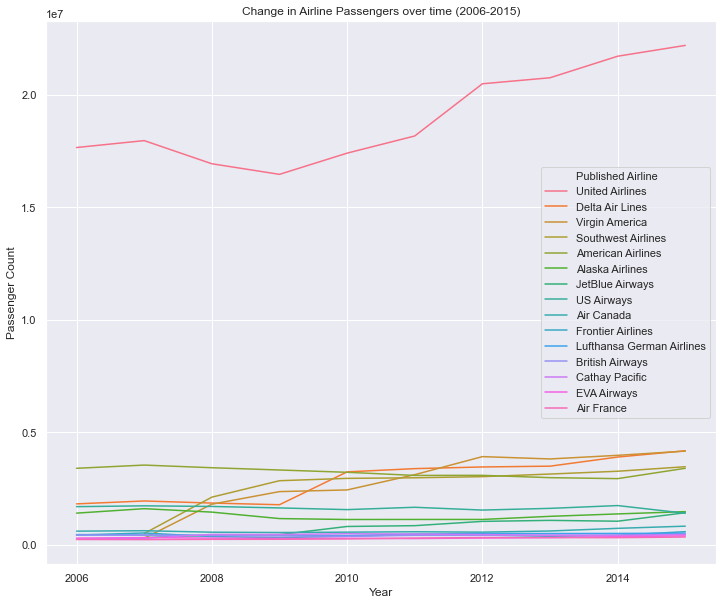

In [39]:
import seaborn as sns

sns.set(rc={'figure.figsize':(12,10)})

sns.lineplot(data=yearlydata,x='Year',y='Passenger Count',hue='Published Airline').set_title("Change in Airline Passengers over time (2006-2015)")

Removing United Airlines to show rest of airlines better

Text(0.5, 1.0, 'Change in Airline Passengers over time (2006-2015)')

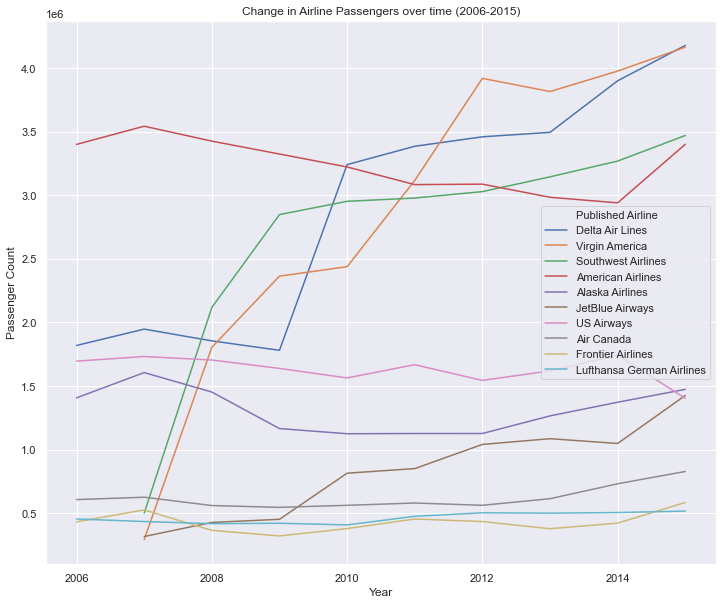

In [40]:
topyearlydata = topyearlydata[1:11]
topyearlydata
yearlydata = yearlydata[yearlydata['Published Airline'].isin(topyearlydata)]
sns.set(rc={'figure.figsize':(12,10)})
sns.lineplot(data=yearlydata,x='Year',y='Passenger Count',hue='Published Airline').set_title("Change in Airline Passengers over time (2006-2015)")

In [41]:
international = pd.read_csv('International_Report_Passengers.csv')

In [42]:
international.head()

,data_dte,Year,Month,usg_apt_id,usg_apt,usg_wac,fg_apt_id,fg_apt,fg_wac,airlineid,carrier,carriergroup,type,Scheduled,Charter,Total
0,05/01/2014,2014,5,14492,RDU,36,11032,CUN,148,19534,AM,0,Passengers,0,315,315
1,06/01/2007,2007,6,13204,MCO,33,16085,YHZ,951,20364,C6,0,Passengers,0,683,683
2,12/01/2005,2005,12,11433,DTW,43,10411,AUA,277,20344,RD,1,Passengers,0,1010,1010
3,04/01/2003,2003,4,13487,MSP,63,16304,ZIH,148,20204,MG,1,Passengers,0,508,508
4,12/01/2005,2005,12,12016,GUM,5,11138,CRK,766,20312,TZ,1,Passengers,0,76,76


In [43]:
international = international[['Year','Month','usg_apt','fg_apt','carrier','Total']]
international.rename(columns={'usg_apt':'us_airport','fg_apt':'foreign_airport','Total':'Passengers'}, inplace=True)
international = international[(international['Year'] != 2020)]
international.head()

,Year,Month,us_airport,foreign_airport,carrier,Passengers
0,2014,5,RDU,CUN,AM,315
1,2007,6,MCO,YHZ,C6,683
2,2005,12,DTW,AUA,RD,1010
3,2003,4,MSP,ZIH,MG,508
4,2005,12,GUM,CRK,TZ,76


In [44]:
airports = pd.read_csv('airports.csv')
international = pd.merge(international,airports,how='inner',left_on=international.foreign_airport,right_on = airports.IATA)
international.rename(columns={'Name':'foreign_airport_name'},inplace=True)

In [45]:
international.head()

,key_0,Year,Month,us_airport,foreign_airport,carrier,Passengers,foreign_airport_name,City,Country,IATA,ICAO,Latitude,Longitude
0,CUN,2014,5,RDU,CUN,AM,315,Cancún International Airport,Cancun,Mexico,CUN,MMUN,21.036501,-86.877098
1,CUN,2001,1,MSY,CUN,5X,90,Cancún International Airport,Cancun,Mexico,CUN,MMUN,21.036501,-86.877098
2,CUN,2006,11,DEN,CUN,MG,2642,Cancún International Airport,Cancun,Mexico,CUN,MMUN,21.036501,-86.877098
3,CUN,2006,6,DTW,CUN,MG,2336,Cancún International Airport,Cancun,Mexico,CUN,MMUN,21.036501,-86.877098
4,CUN,2005,3,MLI,CUN,RD,167,Cancún International Airport,Cancun,Mexico,CUN,MMUN,21.036501,-86.877098


In [46]:
international.drop(columns=['key_0','carrier','City','IATA','ICAO','Latitude','Longitude'],inplace=True)

US Air passengers by year:

Text(0.5, 1.0, 'Total US International Passengers by Year')

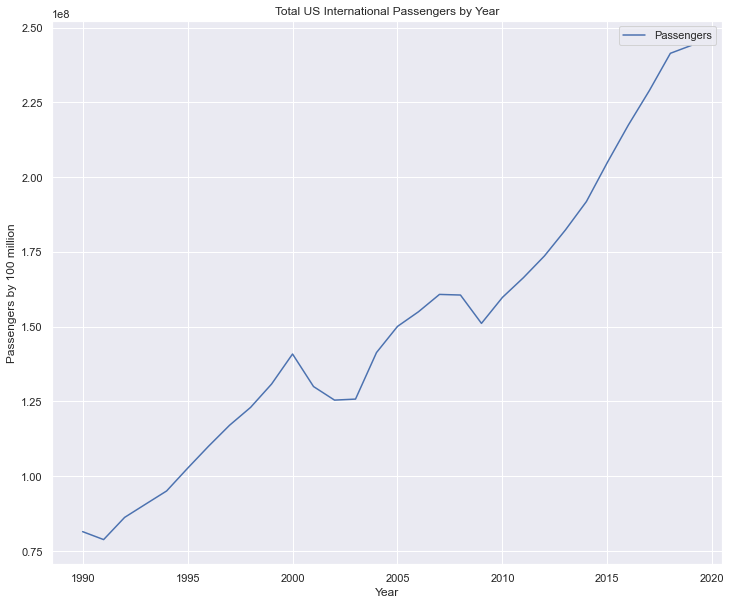

In [47]:
yearly2 = international.groupby(['Year']).sum()
yearly2.reset_index(inplace=True)
yearly2.plot.line(x='Year',y='Passengers')
plt.ylabel('Passengers by 100 million')
plt.title('Total US International Passengers by Year')

US Air passengers by year:

Text(0.5, 1.0, 'Total US International Passengers by Month')

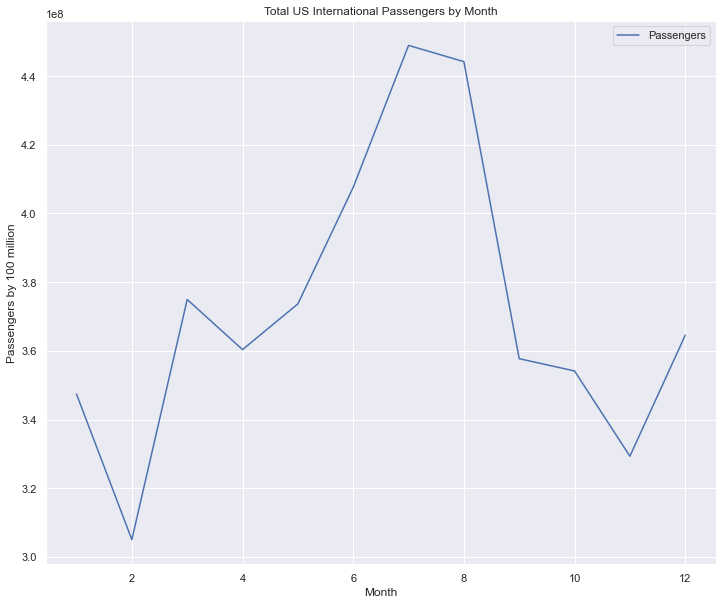

In [48]:
yearly3 = international.groupby(['Month']).sum()
yearly3.reset_index(inplace=True)
yearly3.plot.line(x='Month',y='Passengers')
plt.ylabel('Passengers by 100 million')
plt.title('Total US International Passengers by Month')

Monthly US International Passengers

In [50]:
yearly2.drop(columns=['Month'],inplace=True)
yearly2

,Year,Passengers
0,1990,81482351
1,1991,78825669
2,1992,86243959
3,1993,90675931
4,1994,95079642
5,1995,102672290
6,1996,110048566
7,1997,117054745
8,1998,123019376
9,1999,130817714


Most traveled international airports through US airports (1990-2019)

In [51]:
byairport = international.groupby(['foreign_airport_name']).sum()
byairport.sort_values(by='Passengers',ascending=False,inplace=True)
byairport.reset_index
byairport.drop(columns=['Year','Month'],inplace=True)
byairport.head(15)

,Passengers
foreign_airport_name,
London Heathrow Airport,325944783
Lester B. Pearson International Airport,255608042
Narita International Airport,253582314
Frankfurt am Main Airport,173737221
Charles de Gaulle International Airport,153475282
Licenciado Benito Juarez International Airport,148450819
Cancún International Airport,148091011
Amsterdam Airport Schiphol,125159774
Vancouver International Airport,120177103


Most traveled international airports through US airports in 2015

In [52]:
now = international[international['Year'] == 2015]
byairport2 = now.groupby(['foreign_airport_name']).sum()
byairport2.sort_values(by='Passengers',ascending=False,inplace=True)
byairport2.reset_index
byairport2.drop(columns=['Year','Month'],inplace=True)
byairport2.head(15)

,Passengers
foreign_airport_name,
London Heathrow Airport,14586821
Lester B. Pearson International Airport,11078003
Cancún International Airport,8044668
Narita International Airport,7855326
Charles de Gaulle International Airport,6770203
Licenciado Benito Juarez International Airport,6753729
Frankfurt am Main Airport,6643333
Incheon International Airport,5496197
Vancouver International Airport,5118249


In [53]:
sfo = international[international['us_airport'] == 'SFO']

In [54]:
sfo.head()

,Year,Month,us_airport,foreign_airport,Passengers,foreign_airport_name,Country
86,2001,5,SFO,CUN,653,Cancún International Airport,Mexico
817,2001,6,SFO,CUN,1542,Cancún International Airport,Mexico
974,2001,6,SFO,CUN,501,Cancún International Airport,Mexico
1120,2001,7,SFO,CUN,1144,Cancún International Airport,Mexico
1206,2001,4,SFO,CUN,1006,Cancún International Airport,Mexico


Most foreign airports traveled through SFO 1990-2019

In [55]:
sfobyairport = sfo.groupby(['foreign_airport_name']).sum()
sfobyairport.sort_values(by='Passengers',ascending=False,inplace=True)
sfobyairport.reset_index
sfobyairport.drop(columns=['Year','Month'],inplace=True)
sfobyairport.head(15)

,Passengers
foreign_airport_name,
London Heathrow Airport,26121767
Narita International Airport,21720141
Hong Kong International Airport,21171942
Taiwan Taoyuan International Airport,17270221
Vancouver International Airport,15249245
Frankfurt am Main Airport,12878088
Incheon International Airport,11073895
Lester B. Pearson International Airport,10353504
Charles de Gaulle International Airport,9388046


Most foreign airports traveled through SFO in 2015

In [56]:
sfo2015 = sfo[sfo['Year'] == 2015]
sfobyairport2015 = sfo2015.groupby(['foreign_airport_name']).sum()
sfobyairport2015.sort_values(by='Passengers',ascending=False,inplace=True)
sfobyairport2015.reset_index
sfobyairport2015.drop(columns=['Year','Month'],inplace=True)
sfobyairport2015.head(15)

,Passengers
foreign_airport_name,
London Heathrow Airport,1020149
Hong Kong International Airport,822436
Taiwan Taoyuan International Airport,797622
Incheon International Airport,719117
Frankfurt am Main Airport,665096
Vancouver International Airport,660186
Charles de Gaulle International Airport,470508
Lester B. Pearson International Airport,453110
Beijing Capital International Airport,419363


In [57]:
yearlyairports = pd.DataFrame(sfo.groupby(['Year','foreign_airport_name']).sum())

In [58]:
yearlyairports.head()
yearlyairports.drop(columns='Month',inplace=True)

In [59]:
yearlyairports.head()

Passengers
Year foreign_airport_name                               
1990 Amsterdam Airport Schiphol                     4334
     Calgary International Airport                 85701
     Cancún International Airport                  25352
     Charles de Gaulle International Airport      105238
     Chubu Centrair International Airport            256

In [60]:
yearlyairports.sort_values(by=['Year','Passengers'],ascending=False,inplace=True)

In [61]:
yearlyairports.head()

Passengers
Year foreign_airport_name                            
2019 London Heathrow Airport                  1039908
     Hong Kong International Airport          1015470
     Taiwan Taoyuan International Airport     1001137
     Vancouver International Airport           738029
     Incheon International Airport             699471

Top 15 international airports SFO traveled by year

In [62]:
airportstop10 = yearlyairports.groupby('Year').head(10)
pd.set_option('display.max_rows', airportstop10.shape[0]+1)
print(airportstop10)

                                                         Passengers
Year foreign_airport_name                                          
2019 London Heathrow Airport                                1039908
     Hong Kong International Airport                        1015470
     Taiwan Taoyuan International Airport                   1001137
     Vancouver International Airport                         738029
     Incheon International Airport                           699471
     Lester B. Pearson International Airport                 652906
     Frankfurt am Main Airport                               633414
     Charles de Gaulle International Airport                 545458
     Singapore Changi Airport                                506967
     Shanghai Pudong International Airport                   486292
2018 Hong Kong International Airport                        1107153
     London Heathrow Airport                                1027982
     Taiwan Taoyuan International Airport       

In [63]:
sfobyairport.reset_index(inplace=True)

In [64]:
from __future__ import division

oneyeargrowth = []
twoyeargrowth = []
fiveyeargrowth = []
tenyeargrowth = []
current = []
real2018 = []

for x in sfobyairport['foreign_airport_name']:
        if ((yearlyairports.index.isin([(2015, x)]).any() == True) & (yearlyairports.index.isin([(2010, x)]).any() == True) 
        & (yearlyairports.index.isin([(2014, x)]).any() == True) & (yearlyairports.index.isin([(2013, x)]).any() == True)):
            current.append(yearlyairports.loc(axis=0)[2015, x].iloc[0])
            fiveyeargrowth.append(100*(((((yearlyairports.loc(axis=0)[2015, x])
            - ((yearlyairports.loc(axis=0)[2010, x]))))
            / (yearlyairports.loc(axis=0)[2010, x])).iloc[0])/5)
            oneyeargrowth.append(100*((((yearlyairports.loc(axis=0)[2015, x])
            - ((yearlyairports.loc(axis=0)[2014, x]))))
            / (yearlyairports.loc(axis=0)[2014, x])).iloc[0])
            twoyeargrowth.append(100*(((((yearlyairports.loc(axis=0)[2015, x])
            - ((yearlyairports.loc(axis=0)[2013, x]))))
            / (yearlyairports.loc(axis=0)[2013, x])).iloc[0])/2)
            real2018.append(yearlyairports.loc(axis=0)[2018, x].iloc[0])
        else:    
            fiveyeargrowth.append(0)
            oneyeargrowth.append(0)
            twoyeargrowth.append(0)
            current.append(0)
            real2018.append(0)


In [65]:
sfobyairport['2015 Passengers'] = current
sfobyairport['One year Growth(%)'] = oneyeargrowth
sfobyairport['Avg Two year Growth(%)'] = twoyeargrowth
sfobyairport['Avg Five year Growth(%)'] = fiveyeargrowth
sfobyairport['Projected Growth(%)'] = (sfobyairport['Avg Two year Growth(%)'] + sfobyairport['Avg Five year Growth(%)'] + sfobyairport['Avg Five year Growth(%)'])/3
sfobyairport['2018 Projection'] = sfobyairport['2015 Passengers'] + (3*(sfobyairport['Projected Growth(%)']/100) * sfobyairport['2015 Passengers'])
sfobyairport.sort_values(by='2015 Passengers',ascending=False).head(50)

,foreign_airport_name,Passengers,2015 Passengers,One year Growth(%),Avg Two year Growth(%),Avg Five year Growth(%),Projected Growth(%),2018 Projection
0,London Heathrow Airport,26121767,1020149,11.887887,3.571995,4.244554,4.020368,1.143190e+06
2,Hong Kong International Airport,21171942,822436,0.140024,-2.625582,-1.759416,-2.048138,7.719021e+05
3,Taiwan Taoyuan International Airport,17270221,797622,11.433960,23.734003,10.518778,14.923853,1.154730e+06
6,Incheon International Airport,11073895,719117,1.141205,0.120157,4.668352,3.152287,7.871229e+05
5,Frankfurt am Main Airport,12878088,665096,2.534155,1.986212,4.729907,3.815342,7.412231e+05
4,Vancouver International Airport,15249245,660186,11.462551,13.508979,7.248998,9.335658,8.450841e+05
8,Charles de Gaulle International Airport,9388046,470508,5.112561,7.229530,16.738346,13.568741,6.620340e+05
7,Lester B. Pearson International Airport,10353504,453110,10.175776,12.424571,2.437908,5.766796,5.314998e+05
9,Beijing Capital International Airport,6161649,419363,2.661503,-0.002504,2.845726,1.896316,4.432203e+05
1,Narita International Airport,21720141,378073,-30.363678,-18.817024,-9.263042,-12.447702,2.368888e+05


Compared with the true 2018 data, since we have the data

In [66]:
sfobyairport['True 2018'] = real2018
sfobyairport.sort_values(by='True 2018',ascending=False).head(50)

,foreign_airport_name,Passengers,2015 Passengers,One year Growth(%),Avg Two year Growth(%),Avg Five year Growth(%),Projected Growth(%),2018 Projection,True 2018
2,Hong Kong International Airport,21171942,822436,0.140024,-2.625582,-1.759416,-2.048138,7.719021e+05,1107153
0,London Heathrow Airport,26121767,1020149,11.887887,3.571995,4.244554,4.020368,1.143190e+06,1027982
3,Taiwan Taoyuan International Airport,17270221,797622,11.433960,23.734003,10.518778,14.923853,1.154730e+06,1002191
4,Vancouver International Airport,15249245,660186,11.462551,13.508979,7.248998,9.335658,8.450841e+05,719242
6,Incheon International Airport,11073895,719117,1.141205,0.120157,4.668352,3.152287,7.871229e+05,679494
5,Frankfurt am Main Airport,12878088,665096,2.534155,1.986212,4.729907,3.815342,7.412231e+05,606954
7,Lester B. Pearson International Airport,10353504,453110,10.175776,12.424571,2.437908,5.766796,5.314998e+05,547535
8,Charles de Gaulle International Airport,9388046,470508,5.112561,7.229530,16.738346,13.568741,6.620340e+05,507073
11,Shanghai Pudong International Airport,5795489,365909,-1.831591,8.298070,13.726041,11.916717,4.967220e+05,489209
12,Licenciado Benito Juarez International Airport,5645375,343486,17.273544,14.520892,9.830606,11.394034,4.608967e+05,430938


In [67]:
sfobyairport.sort_values(by='True 2018',ascending=False).head(50)

,foreign_airport_name,Passengers,2015 Passengers,One year Growth(%),Avg Two year Growth(%),Avg Five year Growth(%),Projected Growth(%),2018 Projection,True 2018
2,Hong Kong International Airport,21171942,822436,0.140024,-2.625582,-1.759416,-2.048138,7.719021e+05,1107153
0,London Heathrow Airport,26121767,1020149,11.887887,3.571995,4.244554,4.020368,1.143190e+06,1027982
3,Taiwan Taoyuan International Airport,17270221,797622,11.433960,23.734003,10.518778,14.923853,1.154730e+06,1002191
4,Vancouver International Airport,15249245,660186,11.462551,13.508979,7.248998,9.335658,8.450841e+05,719242
6,Incheon International Airport,11073895,719117,1.141205,0.120157,4.668352,3.152287,7.871229e+05,679494
5,Frankfurt am Main Airport,12878088,665096,2.534155,1.986212,4.729907,3.815342,7.412231e+05,606954
7,Lester B. Pearson International Airport,10353504,453110,10.175776,12.424571,2.437908,5.766796,5.314998e+05,547535
8,Charles de Gaulle International Airport,9388046,470508,5.112561,7.229530,16.738346,13.568741,6.620340e+05,507073
11,Shanghai Pudong International Airport,5795489,365909,-1.831591,8.298070,13.726041,11.916717,4.967220e+05,489209
12,Licenciado Benito Juarez International Airport,5645375,343486,17.273544,14.520892,9.830606,11.394034,4.608967e+05,430938


Fastest growing international airports for SFO travelers:

In [68]:
sfobyairport.sort_values(by='Projected Growth(%)',ascending=False).head(25)

,foreign_airport_name,Passengers,2015 Passengers,One year Growth(%),Avg Two year Growth(%),Avg Five year Growth(%),Projected Growth(%),2018 Projection,True 2018
25,Tokyo Haneda International Airport,1932585,278194,113.727403,66.907884,266.119510,199.715635,1.944985e+06,286245
26,Cancún International Airport,1803999,155585,24.174947,47.347707,248.435128,181.405988,1.002307e+06,225682
166,Paris-Le Bourget Airport,104,23,283.333333,65.000000,56.666667,59.444444,6.401667e+01,15
67,General Juan N Alvarez International Airport,43609,502,364.814815,128.014184,24.424779,58.954581,1.389856e+03,454
27,Montreal / Pierre Elliott Trudeau Internationa...,1555467,109850,17.472811,57.183280,48.427446,51.346057,2.790609e+05,184349
37,General Rafael Buelna International Airport,574638,325,-2.694611,47.891566,29.618321,35.709402,6.731667e+02,135
43,General Francisco J. Mujica International Airport,430735,1440,-91.358099,-13.246554,59.120879,34.998401,2.951931e+03,121
24,Zürich Airport,2094042,159396,14.972807,4.722228,23.667744,17.352572,2.423739e+05,263369
3,Taiwan Taoyuan International Airport,17270221,797622,11.433960,23.734003,10.518778,14.923853,1.154730e+06,1002191
8,Charles de Gaulle International Airport,9388046,470508,5.112561,7.229530,16.738346,13.568741,6.620340e+05,507073


Top 20 countries traveled to through SFO since 1990

In [69]:
bycountry = sfo.groupby(['Country']).sum()
bycountry.sort_values(by='Passengers',ascending=False,inplace=True)
bycountry.reset_index(inplace=True)
bycountry.drop(columns=['Year','Month'],inplace=True)
bycountry.head(20)

,Country,Passengers
0,Canada,33224279
1,Japan,28399449
2,United Kingdom,26493247
3,Mexico,22471471
4,Hong Kong,21171942
5,Germany,17344806
6,Taiwan,17271284
7,China,14057420
8,South Korea,11075525
9,France,9596803


Top 20 countries traveled through SFO in 2015 

In [70]:
sfo2015 = sfo[sfo['Year'] == 2015]
sfo2010 = sfo[sfo['Year'] == 2010]
bycountry2015 = sfo2015.groupby(['Country']).sum()
bycountry2015.sort_values(by='Passengers',ascending=False,inplace=True)
bycountry2015.reset_index(inplace=True)
bycountry2015.drop(columns=['Year','Month'],inplace=True)

bycountry2015.head(21)


,Country,Passengers
0,Canada,1556119
1,Mexico,1035374
2,United Kingdom,1020153
3,China,935425
4,Germany,848162
5,Hong Kong,822436
6,Taiwan,797622
7,Japan,783015
8,South Korea,719117
9,France,470531


Top 20 countries traveled through SFO in 2010

In [71]:
bycountry2010 = sfo2010.groupby(['Country']).sum()
bycountry2010.sort_values(by='Passengers',ascending=False,inplace=True)
bycountry2010.reset_index(inplace=True)
bycountry2010.drop(columns=['Year','Month'],inplace=True)

bycountry2010.head(21)

,Country,Passengers
0,Canada,1289480
1,Hong Kong,901765
2,Japan,868936
3,United Kingdom,842783
4,Germany,748065
5,Mexico,610205
6,China,584364
7,South Korea,583028
8,Taiwan,522709
9,Australia,312974


In [81]:
sfobyairport.reset_index(inplace=True)
yearlyairports.reset_index(inplace=True)

Text(0.5, 1.0, 'Change in Airports with SFO passengers (2006-2015)')

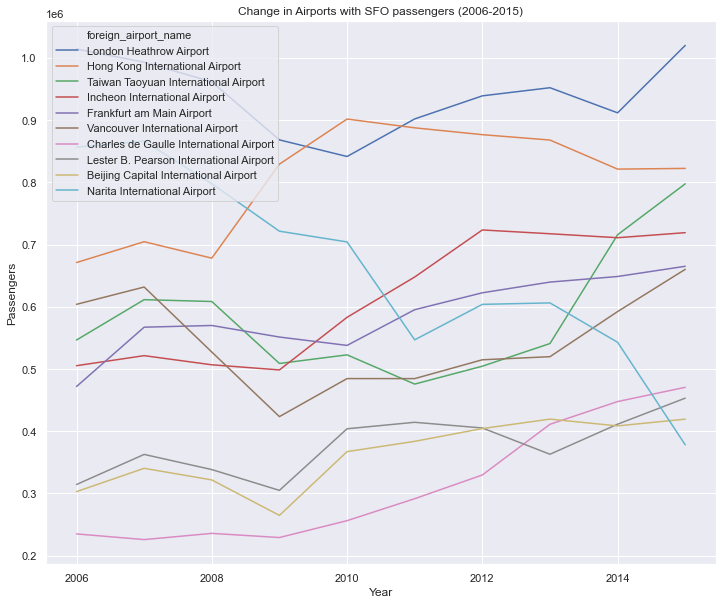

In [82]:
import seaborn as sns
topyearlyairports = sfobyairport.sort_values(by='2015 Passengers', ascending = False).head(10)
topyearlyairports = topyearlyairports['foreign_airport_name']
sfotopairports = yearlyairports[yearlyairports['foreign_airport_name'].isin(topyearlyairports)]
sfotopairports = sfotopairports[sfotopairports['Year'] >2005]
sfotopairports = sfotopairports[sfotopairports['Year'] < 2016]
sns.set(rc={'figure.figsize':(12,10)})
sns.lineplot(data=sfotopairports,x='Year',y='Passengers',hue='foreign_airport_name').set_title("Change in Airports with SFO passengers (2006-2015)")


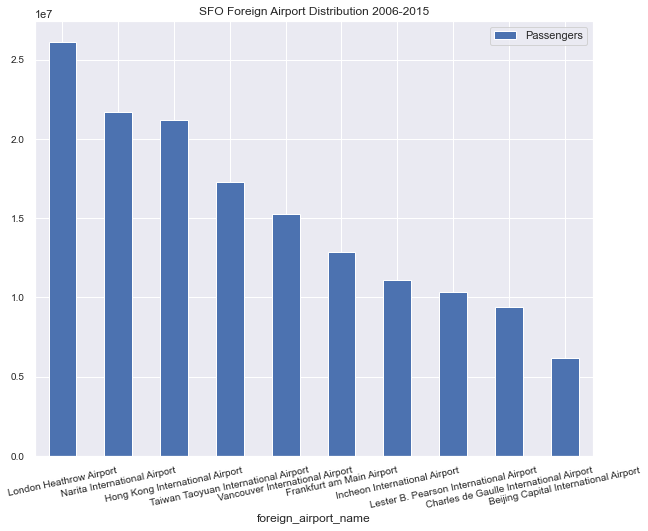

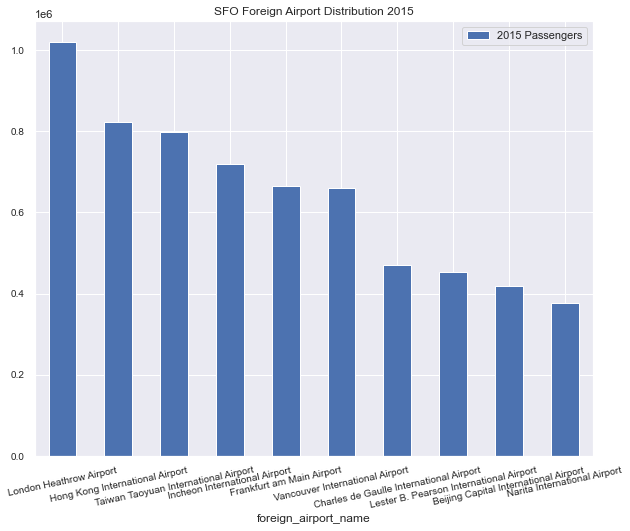

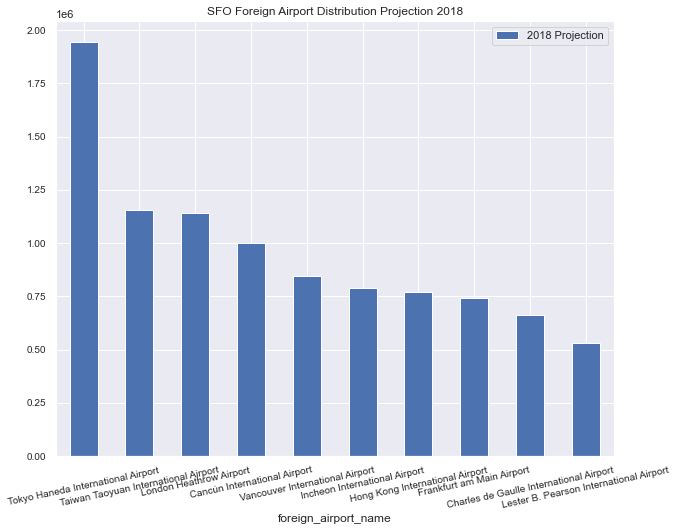

In [84]:
top10airports2015 = sfobyairport.sort_values(by='2015 Passengers',ascending=False).head(10)
top10airports2018 = sfobyairport.sort_values(by='2018 Projection',ascending=False).head(10)
top10airportstotal = sfobyairport.sort_values(by='Passengers',ascending=False).head(10)
top10airportstotal.plot(title='SFO Foreign Airport Distribution 2006-2015',x="foreign_airport_name",y="Passengers",kind="bar", figsize = (10,8),rot=12, fontsize=10)
top10airports2015.plot(title='SFO Foreign Airport Distribution 2015',x="foreign_airport_name",y="2015 Passengers",kind="bar", figsize = (10,8),rot=12, fontsize=10)
top10airports2018.plot(title='SFO Foreign Airport Distribution Projection 2018',x="foreign_airport_name",y="2018 Projection",kind="bar", figsize = (10,8),rot=12, fontsize=10)
